In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['train', 'test_ApKoW4T.csv', 'sample_submission_ns2btKE.csv']


In [2]:
train=pd.read_csv('../input/train/train.csv')
test=pd.read_csv('../input/test_ApKoW4T.csv')


In [3]:
train_images=np.array(train.iloc[:,0])
train_images

array(['2823080.jpg', '2870024.jpg', '2662125.jpg', ..., '2898652.jpg',
       '2868175.jpg', '2784171.jpg'], dtype=object)

In [4]:
img_dir='../input/train/images/'
# test_dir='../input/test_scaled/test_scaled/'

train_images=np.array(train.iloc[:,0])
imagearr=[]
for i in train_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))


In [5]:
imagearr[0]

array([[138, 138, 138, ..., 134, 134, 135],
       [138, 138, 138, ..., 135, 135, 135],
       [139, 139, 139, ..., 136, 135, 134],
       ...,
       [ 71,  60,  52, ...,  26,  36,  62],
       [ 95,  98,  93, ...,  61,  55,  61],
       [ 83, 101,  98, ...,  35,  16,  14]], dtype=uint8)

(6252, 150, 150, 1)


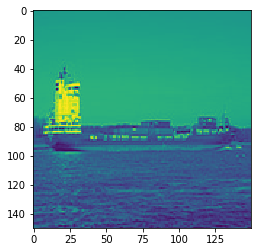

In [6]:
trainImages = np.array([i for i in imagearr]).reshape(-1, 150, 150, 1)
print(trainImages.shape)
plt.imshow(np.asarray(imagearr)[0])

In [7]:
test_images=np.array(test.iloc[:,0])
imagearr=[]
for i in test_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))



In [8]:
# np.asarray(imagearr)
testImages = np.array([i for i in imagearr]).reshape(-1, 150, 150, 1)
print(testImages.shape)

(2680, 150, 150, 1)


In [9]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [10]:
trainLabels = train['category'].values
from keras.utils import np_utils
trainLabels.shape
trainLabels = np_utils.to_categorical(trainLabels)

Using TensorFlow backend.


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [14]:
model.fit(trainImages, trainLabels, batch_size = 100, epochs = 10, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6252/6252 [==============================] - 346s 55ms/step - loss: 1.2154 - acc: 0.5042
Epoch 2/10
6252/6252 [==============================] - 345s 55ms/step - loss: 0.8570 - acc: 0.6582
Epoch 3/10
6252/6252 [==============================] - 345s 55ms/step - loss: 0.6891 - acc: 0.7369
Epoch 4/10
6252/6252 [==============================] - 346s 55ms/step - loss: 0.5615 - acc: 0.7833
Epoch 5/10
6252/6252 [==============================] - 346s 55ms/step - loss: 0.4740 - acc: 0.8204
Epoch 6/10
6252/6252 [==============================] - 345s 55ms/step - loss: 0.4022 - acc: 0.8501
Epoch 7/10
6252/6252 [==============================] - 347s 55ms/step - loss: 0.3316 - acc: 0.8783
Epoch 8/10
6252/6252 [==============================] - 344s 55ms/step - loss: 0.2862 - acc: 0.8927
Epoch 9/10
6252/6252 [==============================] - 344s 55ms/step - loss: 0.2424 - acc: 0.9096
Epoch 10/10
6252/6252 [=============================

In [15]:
# model.predict()

In [16]:
predictions = model.predict_classes(testImages)


In [17]:
predictions.max()


5

In [18]:
# prediction_ = np.argmax(np_utils.to_categorical(predictions), axis = 1)
# prediction_ = encoder.inverse_transform(prediction_)
test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [19]:
test['category']=predictions
test.head()

,image,category
0,1007700.jpg,4
1,1011369.jpg,4
2,1051155.jpg,4
3,1062001.jpg,2
4,1069397.jpg,4


In [20]:
test.to_csv('s2.csv',index=False)